In [32]:
import os
import scipy.io as sio
import csv
import pandas as pd
import numpy as np

# TODO: save unseen labels for all splits

# Mac
data_root = '/Volumes/GoogleDrive/My Drive/colab_data/action_datasets'
# Windows
#data_root = 'G:\\My Drive\\colab_data\\action_datasets'
dataset = 'ucf101'  # ucf101

# /Volumes/GoogleDrive/My Drive/colab_data/action_datasets/hmdb51'
dataset_path = os.path.join(data_root, dataset)

# /Volumes/GoogleDrive/My Drive/colab_data/action_datasets/hmdb51/hmdb51_semantics/split_1/att_splits.mat'
split_path = os.path.join(dataset_path, dataset+'_semantics/split_1')

mat_i3d = sio.loadmat(dataset_path + '/'+ dataset +'_i3d.mat')
mat_split = sio.loadmat(split_path + '/att_splits.mat')

all_labels = mat_i3d['labels']
all_labels_names = mat_split['allclasses_names']
test_unseen_loc = mat_split['test_unseen_loc']

In [33]:
# Run Once Only
all_labels = all_labels.squeeze() - 1
test_unseen_loc = test_unseen_loc.squeeze() - 1 

print(all_labels)
print(len(all_labels))
print(test_unseen_loc)
print(len(test_unseen_loc))


[  0   0   0 ... 100 100 100]
13320
[    0     1     2 ... 12784 12785 12786]
6606


In [34]:
all_labels_names_clean = []
for i in range(len(all_labels_names)):
    all_labels_names_clean.append(all_labels_names[i][0][0])

all_labels_names = np.array(all_labels_names_clean)

# All labels names
print(all_labels_names)

['Apply Eye Makeup' 'Apply Lipstick' 'Archery' 'Baby Crawling'
 'Balance Beam' 'Band Marching' 'Baseball Pitch' 'Basketball Shooting'
 'Basketball Dunk' 'Bench Press' 'Biking' 'Billiards' 'Blow Dry Hair'
 'Blowing Candles' 'Body Weight Squats' 'Bowling' 'Boxing Punching Bag'
 'Boxing Speed Bag' 'Breast Stroke' 'Brushing Teeth' 'Clean And Jerk'
 'Cliff Diving' 'Cricket Bowling' 'Cricket Shot' 'Cutting In Kitchen'
 'Diving' 'Drumming' 'Fencing' 'Field Hockey Penalty' 'Floor Gymnastics'
 'Frisbee Catch' 'Front Crawl' 'Golf Swing' 'Haircut' 'Hammer Throw'
 'Hammering' 'Handstand Pushups' 'Handstand Walking' 'Head Massage'
 'High Jump' 'Horse Race' 'Horse Riding' 'Hula Hoop' 'Ice Dancing'
 'Javelin Throw' 'Juggling Balls' 'Jump Rope' 'Jumping Jack' 'Kayaking'
 'Knitting' 'Long Jump' 'Lunges' 'Military Parade' 'Mixing Batter'
 'Mopping Floor' 'Nunchucks' 'Parallel Bars' 'Pizza Tossing'
 'Playing Guitar' 'Playing Piano' 'Playing Tabla' 'Playing Violin'
 'Playing Cello' 'Playing Daf' 'Playing 

In [35]:
unseen_label = all_labels[test_unseen_loc]
np.unique(unseen_label)
# print(len(np.unique(unseen_label))) # should be 25
# print(len(all_labels_names[unseen_label])) # shplit 1: 3616 testing videos


array([ 0,  2,  4, 10, 11, 12, 13, 15, 17, 19, 20, 22, 28, 29, 30, 31, 34,
       35, 36, 42, 43, 44, 45, 46, 47, 49, 51, 52, 54, 59, 60, 61, 62, 68,
       69, 70, 71, 74, 75, 76, 77, 78, 79, 81, 83, 88, 92, 93, 94, 96],
      dtype=uint8)

In [36]:
unique_unseen_label = np.unique(unseen_label)
unseen_label_name = []
for i in range(len(unique_unseen_label)):
    unseen_label_name.append(all_labels_names[unique_unseen_label[i]])
print(unseen_label_name)
'''
with open('hmdb51_acc_per_class_all.csv', 'a+') as f:
    write = csv.writer(f)
    write.writerow(unseen_label_name)
'''

['Apply Eye Makeup', 'Archery', 'Balance Beam', 'Biking', 'Billiards', 'Blow Dry Hair', 'Blowing Candles', 'Bowling', 'Boxing Speed Bag', 'Brushing Teeth', 'Clean And Jerk', 'Cricket Bowling', 'Field Hockey Penalty', 'Floor Gymnastics', 'Frisbee Catch', 'Front Crawl', 'Hammer Throw', 'Hammering', 'Handstand Pushups', 'Hula Hoop', 'Ice Dancing', 'Javelin Throw', 'Juggling Balls', 'Jump Rope', 'Jumping Jack', 'Knitting', 'Lunges', 'Military Parade', 'Mopping Floor', 'Playing Piano', 'Playing Tabla', 'Playing Violin', 'Playing Cello', 'Pommel Horse', 'Pull Ups', 'Punch', 'Push Ups', 'Rope Climbing', 'Rowing', 'Salsa Spin', 'Shaving Beard', 'Shotput', 'Skate Boarding', 'Skijet', 'Soccer Juggling', 'Swing', 'Throw Discus', 'Trampoline Jumping', 'Typing', 'Volleyball Spiking']


"\nwith open('hmdb51_acc_per_class_all.csv', 'a+') as f:\n    write = csv.writer(f)\n    write.writerow(unseen_label_name)\n"

In [38]:
dataset

'ucf101'

In [47]:
# TODO: save per-class acc for each split grouped by single/dual and fusion method 
# Mac
results_root = '/Volumes/GoogleDrive/My Drive/colab_data/KG_GCN_GAN/zsl'
# Windows
#results_root = 'G:\\My Drive\\colab_data\\KG_GCN_GAN\\zsl'

#file = 'exp_zsl_results_hmdb51_action_class_w2v_avg_img_googlenet_me_max_dual.txt'
if dataset == 'hmdb51':
    split =[]
    acc_per_class = []
    acc_per_class_all_split = []
    all_results = ['exp_zsl_results_' + dataset + '_action_class_w2v.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v.txt',
     'exp_zsl_results_' + dataset + '_avg_img_googlenet_me.txt',
     'exp_zsl_results_' + dataset + '_avg_img_resnet101.txt',

     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_googlenet_me_avg_dual.txt',
     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_resnet101_avg_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_googlenet_me_avg_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_resnet101_avg_dual.txt',

     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_googlenet_me_sum_dual.txt',
     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_resnet101_sum_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_googlenet_me_sum_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_resnet101_sum_dual.txt',

     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_googlenet_me_max_dual.txt',
     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_resnet101_max_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_googlenet_me_max_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_resnet101_max_dual.txt',

     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_googlenet_me_min_dual.txt',
     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_resnet101_min_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_googlenet_me_min_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_resnet101_min_dual.txt',
    ]


    for i in range(0,30):
        split_n = i+1
        with open(dataset+'_acc_per_class.csv', 'a+') as f:
                    write = csv.writer(f)
                    write.writerow(['Split ' + str(split_n)])        

        for res in all_results:

            # exp_zsl_results_hmdb51_action_class_w2v_avg_img_googlenet_me_max_dual.txt (not for avg)
            if res.find('dual') != -1 and res.find('avg_dual') == -1:

                with open(os.path.join(results_root, dataset, res)) as f:
                    lines = [line.rstrip() for line in f]
                    # sp1: 10,11,12; sp2: 23,24,25; sp3: 36,37,38
                    split = lines[10+i*13] + lines[11+i*13] + lines[12+i*13]
                    acc_per_class = split.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace(' ', '').replace('BestZSLunseenper-classaccuracy:tensor', '').split(',')
                    acc_per_class_all_split.append(acc_per_class)

                    with open(dataset+'_acc_per_class.csv', 'a+') as f:
                        write = csv.writer(f)
                        write.writerow(acc_per_class)


            # exp_zsl_results_hmdb51_action_class_w2v_avg_img_resnet101_avg_dual.txt (for avg)
            if res.find('avg_dual') != -1:

                with open(os.path.join(results_root, dataset, res)) as f:
                    lines = [line.rstrip() for line in f]
                    # sp1: 10,11,12; sp2: 22,23,24; sp3: 34,35,36
                    split = lines[9+i*12] + lines[10+i*12] + lines[11+i*12]
                    acc_per_class = split.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace(' ', '').replace('BestZSLunseenper-classaccuracy:tensor', '').split(',')
                    acc_per_class_all_split.append(acc_per_class)

                    with open(dataset+'_acc_per_class.csv', 'a+') as f:
                        write = csv.writer(f)
                        write.writerow(acc_per_class)


            # for single GAN
            if res.find('dual') == -1:

                with open(os.path.join(results_root, dataset, res)) as f:
                    lines = [line.rstrip() for line in f]
                    # sp1: 10,11,12; sp2: 22,23,24; sp3: 34,35,36
                    split = lines[8+i*11] + lines[9+i*11] + lines[10+i*11]
                    acc_per_class = split.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace(' ', '').replace('BestZSLunseenper-classaccuracy:tensor', '').split(',')
                    acc_per_class_all_split.append(acc_per_class)

                    with open(dataset+'_acc_per_class.csv', 'a+') as f:
                        write = csv.writer(f)
                        write.writerow(acc_per_class)

                        
# ucf101
else: 
    split =[]
    acc_per_class = []
    acc_per_class_all_split = []
    all_results = ['exp_zsl_results_' + dataset + '_action_class_w2v.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v.txt',
     'exp_zsl_results_' + dataset + '_avg_img_googlenet_me.txt',
     'exp_zsl_results_' + dataset + '_avg_img_resnet101.txt',

     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_googlenet_me_avg_dual.txt',
     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_resnet101_avg_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_googlenet_me_avg_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_resnet101_avg_dual.txt',

     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_googlenet_me_sum_dual.txt',
     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_resnet101_sum_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_googlenet_me_sum_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_resnet101_sum_dual.txt',

     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_googlenet_me_max_dual.txt',
     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_resnet101_max_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_googlenet_me_max_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_resnet101_max_dual.txt',

     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_googlenet_me_min_dual.txt',
     'exp_zsl_results_' + dataset + '_action_class_w2v_avg_img_resnet101_min_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_googlenet_me_min_dual.txt',
     'exp_zsl_results_' + dataset + '_avg_desc_w2v_avg_img_resnet101_min_dual.txt',
    ]


    for i in range(0,30):
        split_n = i+1
        with open(dataset+'_acc_per_class.csv', 'a+') as f:
                    write = csv.writer(f)
                    write.writerow(['Split ' + str(split_n)])        

        for res in all_results:

            # exp_zsl_results_hmdb51_action_class_w2v_avg_img_googlenet_me_max_dual.txt (not for avg)
            if res.find('dual') != -1 and res.find('avg_dual') == -1:

                with open(os.path.join(results_root, dataset, res)) as f:
                    lines = [line.rstrip() for line in f]
                    # sp1: 11-16; sp2: 27-32; sp3: 43-48
                    split = lines[10+i*16] + lines[11+i*16] + lines[12+i*16] + lines[13+i*16] + lines[14+i*16] + lines[15+i*16]
                    acc_per_class = split.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace(' ', '').replace('BestZSLunseenper-classaccuracy:tensor', '').split(',')
                    acc_per_class_all_split.append(acc_per_class)

                    with open(dataset+'_acc_per_class.csv', 'a+') as f:
                        write = csv.writer(f)
                        write.writerow(acc_per_class)


            # exp_zsl_results_hmdb51_action_class_w2v_avg_img_resnet101_avg_dual.txt (for avg)
            if res.find('avg_dual') != -1:

                with open(os.path.join(results_root, dataset, res)) as f:
                    lines = [line.rstrip() for line in f]
                    # sp1: 10,11,12,13,14,15; sp2: 25,26,27,28,29,30; sp3: 40,41,42,43,44,45
                    split = lines[9+i*15] + lines[10+i*15] + lines[11+i*15] + lines[12+i*15] + lines[13+i*15] + lines[14+i*15]
                    acc_per_class = split.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace(' ', '').replace('BestZSLunseenper-classaccuracy:tensor', '').split(',')
                    acc_per_class_all_split.append(acc_per_class)

                    with open(dataset+'_acc_per_class.csv', 'a+') as f:
                        write = csv.writer(f)
                        write.writerow(acc_per_class)


            # for single GAN
            if res.find('dual') == -1:
                with open(os.path.join(results_root, dataset, res)) as f:
                    lines = [line.rstrip() for line in f]
                    # sp1: 9-14; sp2: 23-28; sp3: 37-42
                    split = lines[8+i*14] + lines[9+i*14] + lines[10+i*14] + lines[11+i*14] + lines[12+i*14] + lines[13+i*14]
                    acc_per_class = split.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace(' ', '').replace('BestZSLunseenper-classaccuracy:tensor', '').split(',')
                    acc_per_class_all_split.append(acc_per_class)

                    with open(dataset+'_acc_per_class.csv', 'a+') as f:
                        write = csv.writer(f)
                        write.writerow(acc_per_class)


In [48]:
# This file needs a bit manual-handling (modified from hmdb51_acc_per_class.csv)
results_file = dataset + '_class_level_results.csv'
results_all = pd.read_csv(results_file, header=None)

# Step1: check if any class is considered as test classes in any split.
# split
test_classes = []
acc_per_classes = []

# split number
for i in range(0,30):

    # test class
    for j in range(1,26):

        # results_all[列 - class name][行 - acc]
        test_class = results_all[j][21*i]
        test_classes.append(test_class)
        #print(test_class)
        
        # results
        acc_per_class = results_all[j][:21*(i+1)]
        acc_per_classes.append(acc_per_class)

# all test class names (will be axis)
all_test_classes = sorted(list(set(test_classes)))
print(all_test_classes)
print(len(all_test_classes))


['Apply Eye Makeup', 'Apply Lipstick', 'Archery', 'Baby Crawling', 'Balance Beam', 'Band Marching', 'Baseball Pitch', 'Basketball Dunk', 'Basketball Shooting', 'Bench Press', 'Biking', 'Billiards', 'Blow Dry Hair', 'Blowing Candles', 'Body Weight Squats', 'Bowling', 'Boxing Punching Bag', 'Boxing Speed Bag', 'Breast Stroke', 'Brushing Teeth', 'Clean And Jerk', 'Cliff Diving', 'Cricket Bowling', 'Cricket Shot', 'Cutting In Kitchen', 'Diving', 'Drumming', 'Fencing', 'Field Hockey Penalty', 'Floor Gymnastics', 'Frisbee Catch', 'Front Crawl', 'Golf Swing', 'Haircut', 'Hammer Throw', 'Hammering', 'Handstand Pushups', 'Handstand Walking', 'Head Massage', 'High Jump', 'Horse Race', 'Horse Riding', 'Hula Hoop', 'Ice Dancing', 'Javelin Throw', 'Juggling Balls', 'Jump Rope', 'Jumping Jack', 'Kayaking', 'Knitting', 'Long Jump', 'Lunges', 'Military Parade', 'Mixing Batter', 'Mopping Floor', 'Nunchucks', 'Parallel Bars', 'Pizza Tossing', 'Playing Guitar', 'Playing Piano', 'Playing Tabla']
61


In [77]:
# Step 2: read and save all results for each test for each split, grouped by test class name 
res_dict = {}

for i in all_test_classes:
    res_list = []
    # 30 splits
    for sp in range(0,30):
        
        # 25 (or 50) test classes for each split
        for test_cls in range(1,51):
            if results_all[test_cls][sp*21] == i:
                res = results_all[test_cls][1+sp*21:21+21*sp]
                res_list.append(res)
                res_dict[i] = res_list
                

Apply Eye Makeup
Apply Eye Makeup
Apply Eye Makeup
Apply Eye Makeup
Apply Eye Makeup
Apply Eye Makeup
Apply Lipstick
Apply Lipstick
Apply Lipstick
Apply Lipstick
Apply Lipstick
Apply Lipstick
Archery
Archery
Archery
Archery
Archery
Archery
Archery
Archery
Archery
Archery
Archery
Archery
Archery
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Baby Crawling
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Balance Beam
Band Marching
Band Marching
Band Marching
Band Marching
Band Marching
Band Marching
Band Marching
Band Marching
Band Marching
Band Marching
Band Marching
Band Marching
Band Marching
Band Marching
Band Marching
Baseball Pitch
Baseball Pitch
Baseball Pitch
Baseball Pitch
Ba

Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jump Rope
Jumping Jack
Jumping Jack
Jumping Jack
Jumping Jack
Jumping Jack
Jumping Jack
Jumping Jack
Jumping Jack
Jumping Jack
Jumping Jack
Jumping Jack
Jumping Jack
Jumping Jack
Jumping Jack
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Kayaking
Knitting
Knitting
Knitting
Knitting
Knitting
Knitting
Knitting
Knitting
Knitting
Knitting
Knitting
Knitting
Knitting
Knitting
Knitting
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Long Jump
Lunges
Lunges
Lunges
Lunges
Lunges
Lunges
Lunges
Lunges
Lunges
Lunges
Lunges
Lunges
Lunges
Lunges
Military Parade
Military Parade
Military Parade
Military Parade
Military Parade
Military Parade
Military Parade
Military Parade
Military Parade
Military 

In [1]:
# check frequency for each test class
#for i in all_test_classes:
    #print(len(res_dict[i]))

In [56]:
# Step 3: averaging results for each test class across single_gan, dual_gan_sum, .., dual_gan_min (20 methods)
final_avg_dict = pd.DataFrame(index = ['class', 'desc', 'googlenet', 'resnet',
                               'class_googlenet_avg' ,'class_resnet_avg','desc_googlenet_avg' ,'desc_resnet_avg',
                              'class_googlenet_sum' ,'class_resnet_sum','desc_googlenet_sum' ,'desc_resnet_sum',
                              'class_googlenet_max' ,'class_resnet_max','desc_googlenet_max' ,'desc_resnet_max',
                              'class_googlenet_min' ,'class_resnet_min','desc_googlenet_min' ,'desc_resnet_min'])

for each_test in all_test_classes:
    res_each_test_cls = []
    for i in range(len(res_dict[each_test])):
        each = np.array(res_dict[each_test][i], dtype=np.float32)
        # restuls for each class
        res_each_test_cls.append(each)
    #print(len(res_each_test_cls))
    final_avg_dict[each_test] = np.mean(res_each_test_cls, axis=0)
    
print(final_avg_dict)
# save avg_class_level_res
final_avg_dict.to_csv(dataset+'_avg_class_level_res.csv', encoding='utf-8')

                     Apply Eye Makeup  Apply Lipstick   Archery  \
class                        0.468967        0.537533  0.384123   
desc                         0.388533        0.512783  0.380462   
googlenet                    0.618383        0.494000  0.536700   
resnet                       0.735617        0.495517  0.521177   
class_googlenet_avg          0.551750        0.560750  0.498200   
class_resnet_avg             0.632183        0.572983  0.478446   
desc_googlenet_avg           0.577033        0.541233  0.484954   
desc_resnet_avg              0.527600        0.612100  0.518254   
class_googlenet_sum          0.604617        0.557633  0.442346   
class_resnet_sum             0.644817        0.579350  0.494362   
desc_googlenet_sum           0.479300        0.660567  0.483162   
desc_resnet_sum              0.755183        0.535100  0.470977   
class_googlenet_max          0.624167        0.499833  0.513015   
class_resnet_max             0.606900        0.596917  0.50925

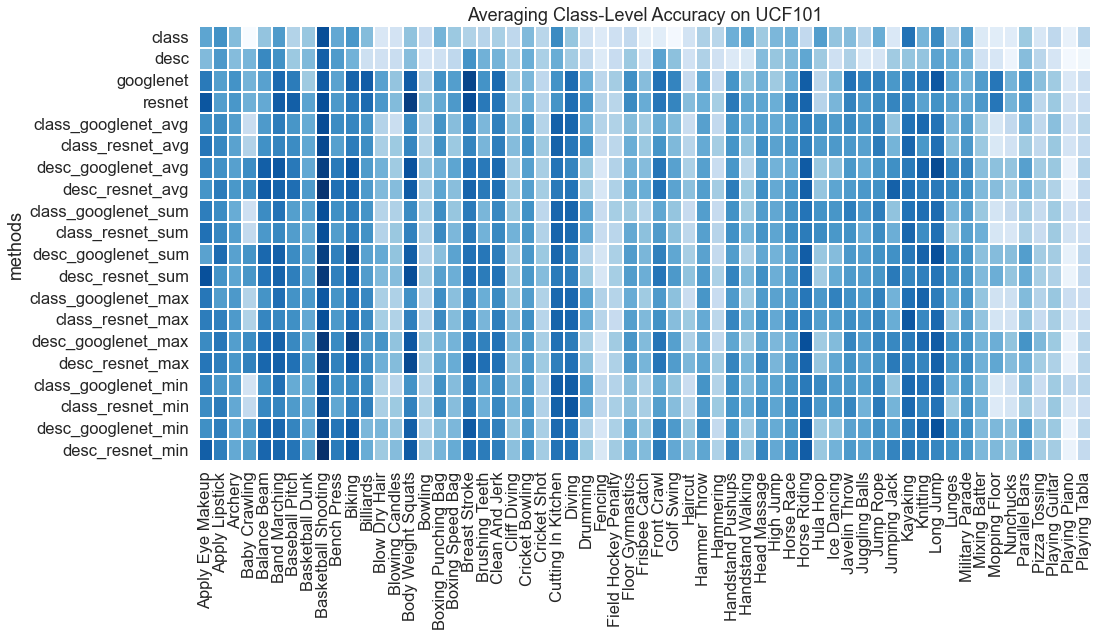

In [169]:
# Heatmap
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

dataset = 'ucf101' # hmdb51
df = pd.read_csv(dataset+'_avg_class_level_res.csv', index_col=0)
#df_max = df[12:16] * 100
#df_max.round(decimals =2)

# plot
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Averaging Class-Level Accuracy on '+dataset.upper())
sns.set(font_scale=1.5)
heatmap = sns.heatmap(df, 
                      cbar=False, 
                      linewidths=1.5, 
                      cmap='Blues', 
                      annot=False, 
                      xticklabels=True, 
                      yticklabels=True,
                      ax=ax) 

fig.savefig('heatmap_'+dataset+'.png',
            dpi=800,
            bbox_inches='tight')

In [163]:
#df_max.style.background_gradient(cmap='Blues')

,brush hair,cart wheel,catch,chew,clap,climb,climb stairs,dive,draw sword,dribble,drink,eat,fall floor,fencing,flic flac,golf,hand stand,hit,hug,jump,kick,kick ball,kiss,laugh,pick,pour,pullup,punch,push,pushup,ride bike,ride horse,run,shake hands,shoot ball,shoot bow,shoot gun,sit,situp,smile,smoke,somersault,stand,swing baseball,sword,sword exercise,talk,throw,turn,walk,wave
methods,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
class_googlenet_max,28.090000,86.050000,2.250000,67.720000,56.040000,12.240000,27.490000,39.620000,45.950000,74.760000,45.970000,45.950000,8.780000,6.180000,9.350000,51.930000,45.450000,20.840000,30.860000,28.150000,41.300000,46.750000,60.850000,50.350000,2.830000,12.340000,44.850000,2.840000,2.360000,80.910000,56.700000,30.240000,30.680000,28.910000,65.020000,37.440000,14.410000,39.140000,65.890000,37.670000,29.760000,44.420000,38.890000,44.060000,21.440000,64.230000,10.070000,15.570000,4.900000,25.350000,25.450000
class_resnet_max,32.480000,84.510000,1.810000,62.890000,56.040000,19.340000,22.700000,34.450000,41.910000,75.590000,42.620000,47.570000,7.170000,6.320000,9.930000,49.930000,46.150000,28.980000,28.670000,27.580000,40.770000,50.960000,55.950000,50.090000,2.720000,18.390000,49.520000,6.480000,2.010000,79.480000,58.900000,43.040000,31.060000,29.060000,64.330000,48.150000,14.040000,35.970000,62.140000,35.920000,33.080000,40.670000,37.160000,57.220000,26.100000,62.770000,14.240000,13.150000,3.850000,29.130000,23.270000
desc_googlenet_max,13.180000,67.760000,17.550000,62.390000,32.660000,5.510000,34.570000,33.070000,34.300000,79.490000,42.310000,46.060000,2.250000,36.850000,11.680000,56.440000,40.010000,4.510000,23.450000,24.650000,26.300000,43.150000,57.350000,42.100000,3.500000,33.260000,39.220000,8.800000,6.320000,47.060000,65.310000,14.120000,36.940000,33.490000,58.220000,58.740000,25.090000,33.450000,45.480000,64.350000,16.170000,46.340000,30.920000,44.310000,28.350000,31.100000,6.670000,26.470000,3.330000,19.130000,8.780000
desc_resnet_max,20.420000,67.160000,27.450000,62.130000,37.510000,10.700000,28.440000,30.270000,34.140000,74.800000,39.700000,50.810000,2.480000,31.180000,16.820000,55.040000,31.540000,6.560000,24.080000,24.740000,33.750000,42.610000,40.410000,42.660000,4.660000,36.320000,41.890000,12.370000,4.430000,42.200000,65.370000,22.210000,36.740000,39.920000,58.850000,67.030000,21.360000,34.620000,34.460000,64.290000,12.210000,46.070000,30.920000,49.520000,30.350000,46.510000,6.820000,27.510000,1.700000,23.610000,7.760000


In [140]:
df_max.iloc[:1]


,methods
methods,
class_googlenet_max,class_googlenet_max
class_resnet_max,class_resnet_max
desc_googlenet_max,desc_googlenet_max
desc_resnet_max,desc_resnet_max


In [10]:
import numpy as np
import pandas as pd

a1 = np.array([1,2,3,4,5])
a2 = np.array([1.1,2.2,3.3,4.4,5.5])
df = pd.DataFrame([a1,a2],columns=['one','two','three','four','five'], index=['idx1','idx2'])
df.to_csv('1.csv', mode='a+')

In [384]:
import pandas as pd
dataset = 'hmdb51'
results_file = dataset + '_class_level_results.csv'
results_all = pd.read_csv(results_file, header=None)

# class names for split 1
#print(results_all[1][0])
#print(results_all[1][1:21])

# class names for sp 2
print(results_all[1][21])
print(results_all[1][21:21+21])



brush hair
21    brush hair
22         0.215
23        0.1776
24         0.271
25        0.4486
26        0.2523
27        0.1869
28        0.1589
29        0.2336
30        0.2243
31        0.3458
32        0.1682
33        0.3551
34        0.4393
35        0.3178
36        0.0935
37        0.2523
38        0.3364
39        0.2056
40        0.0935
41        0.1869
Name: 1, dtype: object


In [383]:
results_all[1][21]

'brush hair'

In [ ]:
######################################################################
# Codes below for testing 

In [ ]:
# Old codes
'''
# Mac
results_root = '/Volumes/GoogleDrive/My Drive/colab_data/KG_GCN_GAN/zsl'
# Windows
#results_root = 'G:\\My Drive\\colab_data\\KG_GCN_GAN\\zsl'

#file = 'exp_zsl_results_hmdb51_action_class_w2v_avg_img_googlenet_me_max_dual.txt'

split =[]
acc_per_class = []
acc_per_class_all_split = []

all_results = ['exp_zsl_results_hmdb51_action_class_w2v.txt',
 'exp_zsl_results_hmdb51_avg_desc_w2v.txt',
 'exp_zsl_results_hmdb51_avg_img_googlenet_me.txt',
 'exp_zsl_results_hmdb51_avg_img_resnet101.txt',
               
 'exp_zsl_results_hmdb51_action_class_w2v_avg_img_googlenet_me_avg_dual.txt',
 'exp_zsl_results_hmdb51_action_class_w2v_avg_img_resnet101_avg_dual.txt',
 'exp_zsl_results_hmdb51_avg_desc_w2v_avg_img_googlenet_me_avg_dual.txt',
 'exp_zsl_results_hmdb51_avg_desc_w2v_avg_img_resnet101_avg_dual.txt',
               
 'exp_zsl_results_hmdb51_action_class_w2v_avg_img_googlenet_me_sum_dual.txt',
 'exp_zsl_results_hmdb51_action_class_w2v_avg_img_resnet101_sum_dual.txt',
 'exp_zsl_results_hmdb51_avg_desc_w2v_avg_img_googlenet_me_sum_dual.txt',
 'exp_zsl_results_hmdb51_avg_desc_w2v_avg_img_resnet101_sum_dual.txt',
               
 'exp_zsl_results_hmdb51_action_class_w2v_avg_img_googlenet_me_max_dual.txt',
 'exp_zsl_results_hmdb51_action_class_w2v_avg_img_resnet101_max_dual.txt',
 'exp_zsl_results_hmdb51_avg_desc_w2v_avg_img_googlenet_me_max_dual.txt',
 'exp_zsl_results_hmdb51_avg_desc_w2v_avg_img_resnet101_max_dual.txt',
               
 'exp_zsl_results_hmdb51_action_class_w2v_avg_img_googlenet_me_min_dual.txt',
 'exp_zsl_results_hmdb51_action_class_w2v_avg_img_resnet101_min_dual.txt',
 'exp_zsl_results_hmdb51_avg_desc_w2v_avg_img_googlenet_me_min_dual.txt',
 'exp_zsl_results_hmdb51_avg_desc_w2v_avg_img_resnet101_min_dual.txt',
]

for res in all_results:
    
    # exp_zsl_results_hmdb51_action_class_w2v_avg_img_googlenet_me_max_dual.txt (not for avg)
    if res.find('dual') != -1 and res.find('avg_dual') == -1:

        print(res)
        with open(dataset+'_acc_per_class.csv', 'a+') as f:
            write = csv.writer(f)
            write.writerow([res])

        with open(os.path.join(results_root, dataset, res)) as f:
            lines = [line.rstrip() for line in f]
            # sp1: 10,11,12; sp2: 23,24,25; sp3: 36,37,38
            for i in range(0,3):
                epoch = i+1
                split = lines[10+i*13] + lines[11+i*13] + lines[12+i*13]
                #print(split)
                acc_per_class = split.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace(' ', '').replace('BestZSLunseenper-classaccuracy:tensor', '').split(',')
                #print(acc_per_class)
                acc_per_class_all_split.append(acc_per_class)

                with open(dataset+'_acc_per_class.csv', 'a+') as f:
                    write = csv.writer(f)
                    write.writerow(['Split ' + str(epoch)])
                    write.writerow(acc_per_class)
    
    # exp_zsl_results_hmdb51_action_class_w2v_avg_img_resnet101_avg_dual.txt (for avg)
    if res.find('avg_dual') != -1:
        with open(dataset+'_acc_per_class.csv', 'a+') as f:
            write = csv.writer(f)
            write.writerow([res])

        with open(os.path.join(results_root, dataset, res)) as f:
            lines = [line.rstrip() for line in f]
            # sp1: 10,11,12; sp2: 22,23,24; sp3: 34,35,36
            for i in range(0,3):
                epoch = i+1
                split = lines[9+i*12] + lines[10+i*12] + lines[11+i*12]
                #print(split)
                acc_per_class = split.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace(' ', '').replace('BestZSLunseenper-classaccuracy:tensor', '').split(',')
                #print(acc_per_class)
                acc_per_class_all_split.append(acc_per_class)

                with open(dataset+'_acc_per_class.csv', 'a+') as f:
                    write = csv.writer(f)
                    write.writerow(['Split ' + str(epoch)])
                    write.writerow(acc_per_class)
    
    # for single GAN
    if res.find('dual') == -1:
        with open(dataset+'_acc_per_class.csv', 'a+') as f:
            write = csv.writer(f)
            write.writerow([res])

        with open(os.path.join(results_root, dataset, res)) as f:
            lines = [line.rstrip() for line in f]
            # sp1: 10,11,12; sp2: 22,23,24; sp3: 34,35,36
            for i in range(0,3):
                epoch = i+1
                split = lines[8+i*11] + lines[9+i*11] + lines[10+i*11]
                #print(split)
                acc_per_class = split.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace(' ', '').replace('BestZSLunseenper-classaccuracy:tensor', '').split(',')
                #print(acc_per_class)
                acc_per_class_all_split.append(acc_per_class)

                with open(dataset+'_acc_per_class.csv', 'a+') as f:
                    write = csv.writer(f)
                    write.writerow(['Split ' + str(epoch)])
                    write.writerow(acc_per_class)
'''

In [56]:
file = 'exp_zsl_results_hmdb51_action_class_w2v.txt'
with open(os.path.join(results_root, dataset, file)) as f:
    lines = [line.rstrip() for line in f]

split1 = lines[8] + lines[9] + lines[10]
split1

'Best ZSL unseen per-class accuracy: tensor([0.0000, 0.0000, 0.5000, 0.4757, 0.4573, 0.5648, 0.3456, 0.7810, 0.9558,        0.2520, 0.0254, 0.0154, 0.2031, 0.2549, 0.0238, 0.0948, 0.2621, 0.7670,        0.0302, 0.7654, 0.2524, 0.1714, 0.0000, 0.0083, 0.7336])'

In [10]:
acc_per_class_sp1 = split1.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace(' ', '').replace('BestZSLunseenper-classaccuracy:tensor', '').split(',')

In [12]:
# next 13 lines for next split
split2 = lines[23] + lines[24] + lines[25]
split2

'Best ZSL unseen per-class accuracy: tensor([0.4393, 0.6822, 0.0000, 0.6308, 0.1111, 0.7685, 0.0956, 0.6121, 0.0000,        0.0000, 0.0265, 0.1987, 0.6538, 0.7891, 0.0000, 0.6415, 0.0086, 0.6893,        0.5049, 0.5991, 0.9237, 0.2762, 0.0571, 0.8531, 0.1538])'

In [13]:
acc_per_class_sp2 = split2.replace('(', '').replace(')', '').replace('[', '').replace(']', '').replace(' ', '').replace('BestZSLunseenper-classaccuracy:tensor', '').split(',')